# TCC - Modelo de Predição AVC

## Importando bibliotecas e lendo a base do Kaggle

In [0]:
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import numpy as np
import random


In [0]:
arquivo = '/FileStore/tables/healthcare_dataset_stroke_data.csv'
file_type = 'csv'

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(arquivo)

display(df)

id gender age hypertension heart_disease ever_married work_type Residence_type avg_glucose_level bmi smoking_status stroke 9046 Male 67 0 1 Yes Private Urban 228.69 36.6 formerly smoked 1 51676 Female 61 0 0 Yes Self-employed Rural 202.21 N/A never smoked 1 31112 Male 80 0 1 Yes Private Rural 105.92 32.5 never smoked 1 60182 Female 49 0 0 Yes Private Urban 171.23 34.4 smokes 1 1665 Female 79 1 0 Yes Self-employed Rural 174.12 24 never smoked 1 56669 Male 81 0 0 Yes Private Urban 186.21 29 formerly smoked 1 53882 Male 74 1 1 Yes Private Rural 70.09 27.4 never smoked 1 10434 Female 69 0 0 No Private Urban 94.39 22.8 never smoked 1 27419 Female 59 0 0 Yes Private Rural 76.15 N/A Unknown 1 60491 Female 78 0 0 Yes Private Urban 58.57 24.2 Unknown 1 12109 Female 81 1 0 Yes Private Rural 80.43 29.7 never smoked 1 12095 Female 61 0 1 Yes Govt_job Rural 120.46 36.8 smokes 1 12175 Female 54 0 0 Yes Private Urban 104.51 27.3 smokes 1 8213 Male 78 0 1 Yes Private Urban 219.84 N/A Unknown 1 5317 Female 79 0 1 Yes Private Urban 214.09 28.2 never smoked 1 58202 Female 50 1 0 Yes Self-employed Rural 167.41 30.9 never smoked 1 56112 Male 64 0 1 Yes Private Urban 191.61 37.5 smokes 1 34120 Male 75 1 0 Yes Private Urban 221.29 25.8 smokes 1 27458 Female 60 0 0 No Private Urban 89.22 37.8 never smoked 1 25226 Male 57 0 1 No Govt_job Urban 217.08 N/A Unknown 1 70630 Female 71 0 0 Yes Govt_job Rural 193.94 22.4 smokes 1 13861 Female 52 1 0 Yes Self-employed Urban 233.29 48.9 never smoked 1 68794 Female 79 0 0 Yes Self-employed Urban 228.7 26.6 never smoked 1 64778 Male 82 0 1 Yes Private Rural 208.3 32.5 Unknown 1 4219 Male 71 0 0 Yes Private Urban 102.87 27.2 formerly smoked 1 70822 Male 80 0 0 Yes Self-employed Rural 104.12 23.5 never smoked 1 38047 Female 65 0 0 Yes Private Rural 100.98 28.2 formerly smoked 1 61843 Male 58 0 0 Yes Private Rural 189.84 N/A Unknown 1 54827 Male 69 0 1 Yes Self-employed Urban 195.23 28.3 smokes 1 69160 Male 59 0 0 Yes Private Rural 211.78 N/A formerly smoked 1 43717 Male 57 1 0 Yes Private Urban 212.08 44.2 smokes 1 33879 Male 42 0 0 Yes Private Rural 83.41 25.4 Unknown 1 39373 Female 82 1 0 Yes Self-employed Urban 196.92 22.2 never smoked 1 54401 Male 80 0 1 Yes Self-employed Urban 252.72 30.5 formerly smoked 1 14248 Male 48 0 0 No Govt_job Urban 84.2 29.7 never smoked 1 712 Female 82 1 1 No Private Rural 84.03 26.5 formerly smoked 1 47269 Male 74 0 0 Yes Private Rural 219.72 33.7 formerly smoked 1 24977 Female 72 1 0 Yes Private Rural 74.63 23.1 formerly smoked 1 47306 Male 58 0 0 No Private Rural 92.62 32 Unknown 1 62602 Female 49 0 0 Yes Private Urban 60.91 29.9 never smoked 1 4651 Male 78 0 0 Yes Private Rural 78.03 23.9 formerly smoked 1 1261 Male 54 0 0 Yes Private Urban 71.22 28.5 never smoked 1 61960 Male 82 0 1 Yes Private Urban 144.9 26.4 smokes 1 1845 Female 63 0 0 Yes Private Urban 90.9 N/A formerly smoked 1 7937 Male 60 1 0 Yes Govt_job Urban 213.03 20.2 smokes 1 19824 Male 76 1 0 Yes Private Rural 243.58 33.6 never smoked 1 37937 Female 75 0 1 No Self-employed Urban 109.78 N/A Unknown 1 47472 Female 58 0 0 Yes Private Urban 107.26 38.6 formerly smoked 1 35626 Male 81 0 0 Yes Self-employed Urban 99.33 33.7 never smoked 1 36338 Female 39 1 0 Yes Private Rural 58.09 39.2 smokes 1 18587 Female 76 0 0 No Private Urban 89.96 N/A Unknown 1 15102 Male 78 1 0 Yes Private Urban 75.32 N/A formerly smoked 1 59190 Female 79 0 1 Yes Private Rural 127.29 27.7 never smoked 1 47167 Female 77 1 0 Yes Self-employed Urban 124.13 31.4 never smoked 1 8752 Female 63 0 0 Yes Govt_job Urban 197.54 N/A never smoked 1 25831 Male 63 0 1 Yes Private Rural 196.71 36.5 formerly smoked 1 38829 Female 82 0 0 Yes Private Rural 59.32 33.2 never smoked 1 66400 Male 78 0 0 Yes Private Urban 237.75 N/A formerly smoked 1 58631 Male 73 1 0 Yes Self-employed Urban 194.99 32.8 never smoked 1 5111 Female 54 1 0 Yes Govt_job Urban 180.93 27.7 never smoked 1 10710 Female 56 0 0 Yes Private Urban 185.17 40.4 formerly smoked 1 55927 Female 80 1 0

In [0]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: string (nullable = true)



#### Renomeando colunas e alterando tipagem

In [0]:
df_spark_tratado = df.select(
    col('id').alias('ID').cast('integer'),
    col('gender').alias('GENERO'),
    col('age').alias('IDADE').cast('integer'),
    col('hypertension').alias('HIPERTENSO').cast('integer'),
    col('heart_disease').alias('DOENCA_CARDIACA').cast('integer'),
    col('ever_married').alias('JA_FOI_CASADO'),
    col('work_type').alias('PROFISSAO'),
    col('Residence_type').alias('RESIDENCIA'),
    col('avg_glucose_level').alias('NIVEL_MEDIO_GLICOSE').cast('double'),
    col('bmi').alias('IMC').cast('double'),
    col('smoking_status').alias('FUMA'),
    col('stroke').alias('AVC').cast('integer')
)

In [0]:
display(df_spark_tratado)

ID GENERO IDADE HIPERTENSO DOENCA_CARDIACA JA_FOI_CASADO PROFISSAO RESIDENCIA NIVEL_MEDIO_GLICOSE IMC FUMA AVC 9046 Male 67 false true Yes Private Urban 228.69 36.6 formerly smoked true 51676 Female 61 false false Yes Self-employed Rural 202.21 null never smoked true 31112 Male 80 false true Yes Private Rural 105.92 32.5 never smoked true 60182 Female 49 false false Yes Private Urban 171.23 34.4 smokes true 1665 Female 79 true false Yes Self-employed Rural 174.12 24.0 never smoked true 56669 Male 81 false false Yes Private Urban 186.21 29.0 formerly smoked true 53882 Male 74 true true Yes Private Rural 70.09 27.4 never smoked true 10434 Female 69 false false No Private Urban 94.39 22.8 never smoked true 27419 Female 59 false false Yes Private Rural 76.15 null Unknown true 60491 Female 78 false false Yes Private Urban 58.57 24.2 Unknown true 12109 Female 81 true false Yes Private Rural 80.43 29.7 never smoked true 12095 Female 61 false true Yes Govt_job Rural 120.46 36.8 smokes true 12175 Female 54 false false Yes Private Urban 104.51 27.3 smokes true 8213 Male 78 false true Yes Private Urban 219.84 null Unknown true 5317 Female 79 false true Yes Private Urban 214.09 28.2 never smoked true 58202 Female 50 true false Yes Self-employed Rural 167.41 30.9 never smoked true 56112 Male 64 false true Yes Private Urban 191.61 37.5 smokes true 34120 Male 75 true false Yes Private Urban 221.29 25.8 smokes true 27458 Female 60 false false No Private Urban 89.22 37.8 never smoked true 25226 Male 57 false true No Govt_job Urban 217.08 null Unknown true 70630 Female 71 false false Yes Govt_job Rural 193.94 22.4 smokes true 13861 Female 52 true false Yes Self-employed Urban 233.29 48.9 never smoked true 68794 Female 79 false false Yes Self-employed Urban 228.7 26.6 never smoked true 64778 Male 82 false true Yes Private Rural 208.3 32.5 Unknown true 4219 Male 71 false false Yes Private Urban 102.87 27.2 formerly smoked true 70822 Male 80 false false Yes Self-employed Rural 104.12 23.5 never smoked true 38047 Female 65 false false Yes Private Rural 100.98 28.2 formerly smoked true 61843 Male 58 false false Yes Private Rural 189.84 null Unknown true 54827 Male 69 false true Yes Self-employed Urban 195.23 28.3 smokes true 69160 Male 59 false false Yes Private Rural 211.78 null formerly smoked true 43717 Male 57 true false Yes Private Urban 212.08 44.2 smokes true 33879 Male 42 false false Yes Private Rural 83.41 25.4 Unknown true 39373 Female 82 true false Yes Self-employed Urban 196.92 22.2 never smoked true 54401 Male 80 false true Yes Self-employed Urban 252.72 30.5 formerly smoked true 14248 Male 48 false false No Govt_job Urban 84.2 29.7 never smoked true 712 Female 82 true true No Private Rural 84.03 26.5 formerly smoked true 47269 Male 74 false false Yes Private Rural 219.72 33.7 formerly smoked true 24977 Female 72 true false Yes Private Rural 74.63 23.1 formerly smoked true 47306 Male 58 false false No Private Rural 92.62 32.0 Unknown true 62602 Female 49 false false Yes Private Urban 60.91 29.9 never smoked true 4651 Male 78 false false Yes Private Rural 78.03 23.9 formerly smoked true 1261 Male 54 false false Yes Private Urban 71.22 28.5 never smoked true 61960 Male 82 false true Yes Private Urban 144.9 26.4 smokes true 1845 Female 63 false false Yes Private Urban 90.9 null formerly smoked true 7937 Male 60 true false Yes Govt_job Urban 213.03 20.2 smokes true 19824 Male 76 true false Yes Private Rural 243.58 33.6 never smoked true 37937 Female 75 false true No Self-employed Urban 109.78 null Unknown true 47472 Female 58 false false Yes Private Urban 107.26 38.6 formerly smoked true 35626 Male 81 false false Yes Self-employed Urban 99.33 33.7 never smoked true 36338 Female 39 true false Yes Private Rural 58.09 39.2 smokes true 18587 Female 76 false false No Private Urban 89.96 null Unknown true 15102 Male 78 true false Yes Private Urban 75.32 null formerly smoked true 59190 Female 79 false true Yes Private Rural 127.29 27.7 never smoke

In [0]:
df_spark_tratado.select('IDADE').distinct().orderBy('IDADE', ascending = True).show()

+-----+
|IDADE|
+-----+
|    0|
|    1|
|    2|
|    3|
|    4|
|    5|
|    6|
|    7|
|    8|
|    9|
|   10|
|   11|
|   12|
|   13|
|   14|
|   15|
|   16|
|   17|
|   18|
|   19|
+-----+
only showing top 20 rows



In [0]:
df_spark_tratado.filter((col('IDADE') <= 40) & (col('AVC') == 1)).orderBy('IDADE', ascending = True).show()

+-----+------+-----+----------+---------------+-------------+-------------+----------+-------------------+----+---------------+---+
|   ID|GENERO|IDADE|HIPERTENSO|DOENCA_CARDIACA|JA_FOI_CASADO|    PROFISSAO|RESIDENCIA|NIVEL_MEDIO_GLICOSE| IMC|           FUMA|AVC|
+-----+------+-----+----------+---------------+-------------+-------------+----------+-------------------+----+---------------+---+
|69768|Female|    1|         0|              0|           No|     children|     Urban|              70.37|null|        Unknown|  1|
|49669|Female|   14|         0|              0|           No|     children|     Rural|              57.93|30.9|        Unknown|  1|
|39912|Female|   32|         0|              0|          Yes|      Private|     Rural|              76.13|29.9|         smokes|  1|
|31720|Female|   38|         0|              0|           No|Self-employed|     Urban|              82.28|24.0|formerly smoked|  1|
|31563|Female|   38|         0|              0|          Yes|      Private| 

## Análise Exploratória

In [0]:
#Quantidade de pessoas que sofreram AVC

df_spark_tratado.groupBy('AVC').count().show()



+-----+-----+
|  AVC|count|
+-----+-----+
| true|  249|
|false| 4861|
+-----+-----+



In [0]:
df_spark_tratado.groupBy('FUMA').count().show()

+---------------+-----+
|           FUMA|count|
+---------------+-----+
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  885|
+---------------+-----+



In [0]:
df_spark_tratado.groupBy('RESIDENCIA').count().show()

+----------+-----+
|RESIDENCIA|count|
+----------+-----+
|     Urban| 2596|
|     Rural| 2514|
+----------+-----+



In [0]:
df_spark_tratado.groupBy('PROFISSAO').count().show()

+-------------+-----+
|    PROFISSAO|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2925|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+



In [0]:
df_spark_tratado.groupBy('JA_FOI_CASADO').count().show()

+-------------+-----+
|JA_FOI_CASADO|count|
+-------------+-----+
|         true| 3353|
|        false| 1757|
+-------------+-----+



In [0]:
df_spark_tratado.groupBy('GENERO').count().show()

+------+-----+
|GENERO|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+



In [0]:
df_spark_tratado.groupBy('HIPERTENSO').count().show()

+----------+-----+
|HIPERTENSO|count|
+----------+-----+
|         1|  498|
|         0| 4612|
+----------+-----+



In [0]:
df_spark_tratado.summary().show()

+-------+-----------------+------+------------------+------------------+-------------------+-------------+---------+----------+-------------------+------------------+-------+-------------------+
|summary|               ID|GENERO|             IDADE|        HIPERTENSO|    DOENCA_CARDIACA|JA_FOI_CASADO|PROFISSAO|RESIDENCIA|NIVEL_MEDIO_GLICOSE|               IMC|   FUMA|                AVC|
+-------+-----------------+------+------------------+------------------+-------------------+-------------+---------+----------+-------------------+------------------+-------+-------------------+
|  count|             5110|  5110|              5110|              5110|               5110|         5110|     5110|      5110|               5110|              4909|   5110|               5110|
|   mean|36517.82935420744|  null| 43.21526418786693|0.0974559686888454|0.05401174168297456|         null|     null|      null| 106.14767710371804|28.893236911794673|   null| 0.0487279843444227|
| stddev|21161.7216248271

In [0]:
#Transformei em Pandas para facilitar as análises com gráfico
df_pd = df_spark_tratado.toPandas()

In [0]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5110 non-null   int32  
 1   GENERO               5110 non-null   object 
 2   IDADE                5110 non-null   int32  
 3   HIPERTENSO           5110 non-null   int32  
 4   DOENCA_CARDIACA      5110 non-null   int32  
 5   JA_FOI_CASADO        5110 non-null   object 
 6   PROFISSAO            5110 non-null   object 
 7   RESIDENCIA           5110 non-null   object 
 8   NIVEL_MEDIO_GLICOSE  5110 non-null   float64
 9   IMC                  4909 non-null   float64
 10  FUMA                 5110 non-null   object 
 11  AVC                  5110 non-null   int32  
dtypes: float64(2), int32(5), object(5)
memory usage: 379.4+ KB


In [0]:
    df_pd\
    .describe(percentiles = [0.25, 0.5, 0.75, 0.8, 0.9])\
    .T\
    .drop(columns=['count'])\
    .style\
    .background_gradient(axis=1)
    .savefig('summary.png', format='png')


mean 
 std 
 min 
 25% 
 50% 
 75% 
 80% 
 90% 
 max 
 
 
 
 
 ID 
 36517.829354 
 21161.721625 
 67.000000 
 17741.250000 
 36932.000000 
 54682.000000 
 58153.200000 
 65667.600000 
 72940.000000 
 
 
 IDADE 
 43.215264 
 22.633866 
 0.000000 
 25.000000 
 45.000000 
 61.000000 
 65.000000 
 75.000000 
 82.000000 
 
 
 HIPERTENSO 
 0.097456 
 0.296607 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 DOENCA_CARDIACA 
 0.054012 
 0.226063 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 NIVEL_MEDIO_GLICOSE 
 106.147677 
 45.283560 
 55.120000 
 77.245000 
 91.885000 
 114.090000 
 124.160000 
 192.181000 
 271.740000 
 
 
 IMC 
 28.893237 
 7.854067 
 10.300000 
 23.500000 
 28.100000 
 33.100000 
 34.500000 
 38.900000 
 97.600000 
 
 
 AVC 
 0.048728 
 0.215320 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000

Out[22]: <AxesSubplot:xlabel='AVC', ylabel='NIVEL_MEDIO_GLICOSE'>

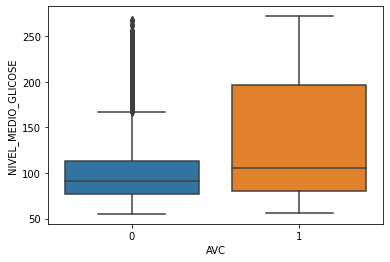

In [0]:
sns.boxplot(data = df_pd, x="AVC", y="NIVEL_MEDIO_GLICOSE")

Out[23]: <AxesSubplot:xlabel='AVC', ylabel='IMC'>

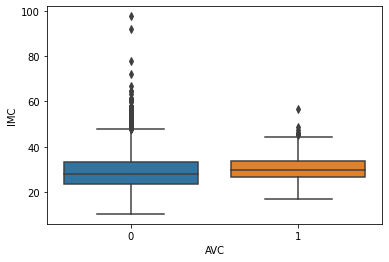

In [0]:
sns.boxplot(data = df_pd, x="AVC", y="IMC")

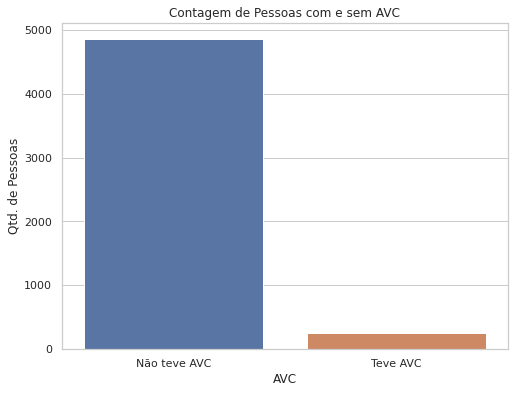

Não tiveram AVC:  4861
Tiveram AVC:  249


In [0]:
df_nao_teve_avc = df_pd[df_pd['AVC'] == 0]
df_teve_avc = df_pd[df_pd['AVC'] == 1]

eixo_Y = [len(df_nao_teve_avc), len(df_teve_avc)]
eixo_X = ['Não teve AVC', 'Teve AVC']

# Criar o gráfico de barras com Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=eixo_X, y=eixo_Y)

plt.xlabel('AVC')
plt.ylabel('Qtd. de Pessoas')
plt.title('Contagem de Pessoas com e sem AVC')

# Exibir o gráfico
plt.show()

print('Não tiveram AVC: ',len(df_nao_teve_avc))
print('Tiveram AVC: ', len(df_teve_avc))

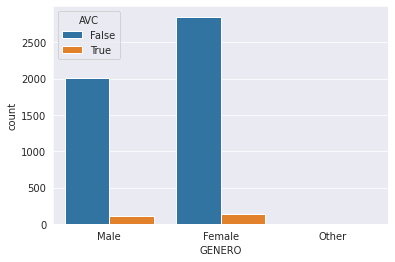

In [0]:
sns.set_style('darkgrid')
sns.countplot(data=df_pd, x='GENERO', hue='AVC')
plt.show()

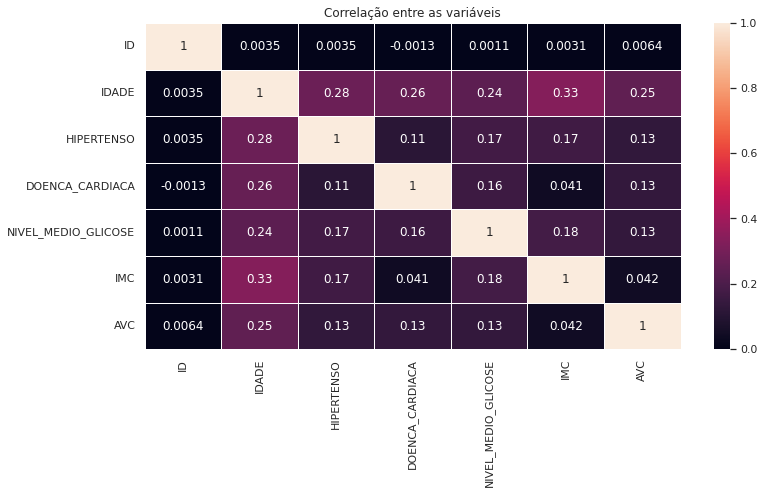

In [0]:
plt.figure(figsize=(12, 6))
 
plt.title('Correlação entre as variáveis')
 
sns.heatmap(
    df_pd.corr(), annot=True, linewidths=1
)
 
plt.show()

## Tratamento dos dados

#### Nulos e Faltantes

In [0]:
percentual_nulos = (df_pd.isna().sum() / len(df_pd)) * 100
display(percentual_nulos)

print('\n Quantidade de nulos da variável IMC: ',df_pd['IMC'].isna().sum())

ID                     0.000000
GENERO                 0.000000
IDADE                  0.000000
HIPERTENSO             0.000000
DOENCA_CARDIACA        0.000000
JA_FOI_CASADO          0.000000
PROFISSAO              0.000000
RESIDENCIA             0.000000
NIVEL_MEDIO_GLICOSE    0.000000
IMC                    3.933464
FUMA                   0.000000
AVC                    0.000000
dtype: float64
 Quantidade de nulos da variável IMC:  201


In [0]:
# Substituindo os valores nulos pela mediana

mediana_imc = df_pd['IMC'].median()
df_pd['IMC'].fillna(mediana_imc, inplace=True)

percentual_nulos = (df_pd.isna().sum() / len(df_pd)) * 100
display(percentual_nulos)

ID                     0.0
GENERO                 0.0
IDADE                  0.0
HIPERTENSO             0.0
DOENCA_CARDIACA        0.0
JA_FOI_CASADO          0.0
PROFISSAO              0.0
RESIDENCIA             0.0
NIVEL_MEDIO_GLICOSE    0.0
IMC                    0.0
FUMA                   0.0
AVC                    0.0
dtype: float64

In [0]:
label_encoder = LabelEncoder()

df_pd['HIPERTENSO'] = label_encoder.fit_transform(df_pd['HIPERTENSO'])
df_pd['DOENCA_CARDIACA'] = label_encoder.fit_transform(df_pd['DOENCA_CARDIACA'])
df_pd['JA_FOI_CASADO'] = label_encoder.fit_transform(df_pd['JA_FOI_CASADO'])
df_pd['RESIDENCIA'] = label_encoder.fit_transform(df_pd['RESIDENCIA'])

In [0]:
df_pd.head()

ID 
 GENERO 
 IDADE 
 HIPERTENSO 
 DOENCA_CARDIACA 
 JA_FOI_CASADO 
 PROFISSAO 
 RESIDENCIA 
 NIVEL_MEDIO_GLICOSE 
 IMC 
 FUMA 
 AVC 
 
 
 
 
 0 
 9046 
 Male 
 67 
 0 
 1 
 1 
 Private 
 1 
 228.69 
 36.6 
 formerly smoked 
 1 
 
 
 1 
 51676 
 Female 
 61 
 0 
 0 
 1 
 Self-employed 
 0 
 202.21 
 28.1 
 never smoked 
 1 
 
 
 2 
 31112 
 Male 
 80 
 0 
 1 
 1 
 Private 
 0 
 105.92 
 32.5 
 never smoked 
 1 
 
 
 3 
 60182 
 Female 
 49 
 0 
 0 
 1 
 Private 
 1 
 171.23 
 34.4 
 smokes 
 1 
 
 
 4 
 1665 
 Female 
 79 
 1 
 0 
 1 
 Self-employed 
 0 
 174.12 
 24.0 
 never smoked 
 1

In [0]:
df_pd = pd.get_dummies(df_pd, columns=['GENERO', 'PROFISSAO', 'FUMA'], prefix='', prefix_sep='')

In [0]:
df_pd.head()

ID 
 IDADE 
 HIPERTENSO 
 DOENCA_CARDIACA 
 JA_FOI_CASADO 
 RESIDENCIA 
 NIVEL_MEDIO_GLICOSE 
 IMC 
 AVC 
 Female 
 ... 
 Other 
 Govt_job 
 Never_worked 
 Private 
 Self-employed 
 children 
 Unknown 
 formerly smoked 
 never smoked 
 smokes 
 
 
 
 
 0 
 9046 
 67 
 0 
 1 
 1 
 1 
 228.69 
 36.6 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 1 
 51676 
 61 
 0 
 0 
 1 
 0 
 202.21 
 28.1 
 1 
 1 
 ... 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 
 
 2 
 31112 
 80 
 0 
 1 
 1 
 0 
 105.92 
 32.5 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 60182 
 49 
 0 
 0 
 1 
 1 
 171.23 
 34.4 
 1 
 1 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1665 
 79 
 1 
 0 
 1 
 0 
 174.12 
 24.0 
 1 
 1 
 ... 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 
 
 
 5 rows × 21 columns

In [0]:
df_pd['MASCULINO'] = df_pd['Male']
df_pd['FEMININO'] = df_pd['Female']
df_pd['OUTROS'] = df_pd['Other']
df_pd['TP_TRAB_FUNCIONARIO_PUBLICO'] = df_pd['Govt_job']
df_pd['TP_TRAB_NUNCA_TRABALHOU'] = df_pd['Never_worked']
df_pd['TP_TRAB_PRIVADO'] = df_pd['Private']
df_pd['TP_TRAB_AUTONOMO'] = df_pd['Self-employed']
df_pd['TP_TRAB_CRIANCA'] = df_pd['children']
df_pd['TP_TRAB_DESCONHECIDO'] = df_pd['Unknown']
df_pd['EX_FUMANTE'] = df_pd['formerly smoked']
df_pd['NUNCA_FUMOU'] = df_pd['never smoked']
df_pd['FUMANTE'] = df_pd['smokes']


df_pd.drop(columns=['Male', 'Female', 'Other', 'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Unknown', 'formerly smoked', 'never smoked', 'smokes' ], inplace=True)

In [0]:
df_pd.head()

ID 
 IDADE 
 HIPERTENSO 
 DOENCA_CARDIACA 
 JA_FOI_CASADO 
 RESIDENCIA 
 NIVEL_MEDIO_GLICOSE 
 IMC 
 AVC 
 MASCULINO 
 ... 
 OUTROS 
 TP_TRAB_FUNCIONARIO_PUBLICO 
 TP_TRAB_NUNCA_TRABALHOU 
 TP_TRAB_PRIVADO 
 TP_TRAB_AUTONOMO 
 TP_TRAB_CRIANCA 
 TP_TRAB_DESCONHECIDO 
 EX_FUMANTE 
 NUNCA_FUMOU 
 FUMANTE 
 
 
 
 
 0 
 9046 
 67 
 0 
 1 
 1 
 1 
 228.69 
 36.6 
 1 
 1 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 1 
 51676 
 61 
 0 
 0 
 1 
 0 
 202.21 
 28.1 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 
 
 2 
 31112 
 80 
 0 
 1 
 1 
 0 
 105.92 
 32.5 
 1 
 1 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 60182 
 49 
 0 
 0 
 1 
 1 
 171.23 
 34.4 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1665 
 79 
 1 
 0 
 1 
 0 
 174.12 
 24.0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 
 
 
 5 rows × 21 columns

In [0]:
df_pd.drop(columns=['ID'], inplace=True)

In [0]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDADE                        5110 non-null   int32  
 1   HIPERTENSO                   5110 non-null   int64  
 2   DOENCA_CARDIACA              5110 non-null   int64  
 3   JA_FOI_CASADO                5110 non-null   int64  
 4   RESIDENCIA                   5110 non-null   int64  
 5   NIVEL_MEDIO_GLICOSE          5110 non-null   float64
 6   IMC                          5110 non-null   float64
 7   AVC                          5110 non-null   int32  
 8   MASCULINO                    5110 non-null   uint8  
 9   FEMININO                     5110 non-null   uint8  
 10  OUTROS                       5110 non-null   uint8  
 11  TP_TRAB_FUNCIONARIO_PUBLICO  5110 non-null   uint8  
 12  TP_TRAB_NUNCA_TRABALHOU      5110 non-null   uint8  
 13  TP_TRAB_PRIVADO   

## Balanceamento dos dados

In [0]:

df_teve_avc = df_pd[df_pd['AVC'] == 1]
df_nao_teve_avc =  df_pd[df_pd['AVC'] == 0]

balanceamento = pd.concat([
    df_teve_avc,
    df_nao_teve_avc
    .sample(n=len(df_teve_avc))],axis=0

)

Out[52]: <AxesSubplot:>

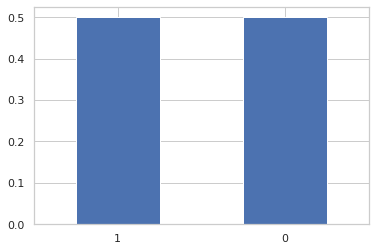

In [0]:
balanceamento['AVC'].value_counts(normalize = True).plot(kind='bar', rot = 0)

## Treino e Teste

In [0]:
display(balanceamento)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:467: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field MASCULINO. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion from Arrow: uint8
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


IDADE HIPERTENSO DOENCA_CARDIACA JA_FOI_CASADO RESIDENCIA NIVEL_MEDIO_GLICOSE IMC AVC MASCULINO FEMININO OUTROS TP_TRAB_FUNCIONARIO_PUBLICO TP_TRAB_NUNCA_TRABALHOU TP_TRAB_PRIVADO TP_TRAB_AUTONOMO TP_TRAB_CRIANCA TP_TRAB_DESCONHECIDO EX_FUMANTE NUNCA_FUMOU FUMANTE 67 0 1 1 1 228.69 36.6 1 1 0 0 0 0 1 0 0 0 1 0 0 61 0 0 1 0 202.21 28.1 1 0 1 0 0 0 0 1 0 0 0 1 0 80 0 1 1 0 105.92 32.5 1 1 0 0 0 0 1 0 0 0 0 1 0 49 0 0 1 1 171.23 34.4 1 0 1 0 0 0 1 0 0 0 0 0 1 79 1 0 1 0 174.12 24.0 1 0 1 0 0 0 0 1 0 0 0 1 0 81 0 0 1 1 186.21 29.0 1 1 0 0 0 0 1 0 0 0 1 0 0 74 1 1 1 0 70.09 27.4 1 1 0 0 0 0 1 0 0 0 0 1 0 69 0 0 0 1 94.39 22.8 1 0 1 0 0 0 1 0 0 0 0 1 0 59 0 0 1 0 76.15 28.1 1 0 1 0 0 0 1 0 0 1 0 0 0 78 0 0 1 1 58.57 24.2 1 0 1 0 0 0 1 0 0 1 0 0 0 81 1 0 1 0 80.43 29.7 1 0 1 0 0 0 1 0 0 0 0 1 0 61 0 1 1 0 120.46 36.8 1 0 1 0 1 0 0 0 0 0 0 0 1 54 0 0 1 1 104.51 27.3 1 0 1 0 0 0 1 0 0 0 0 0 1 78 0 1 1 1 219.84 28.1 1 1 0 0 0 0 1 0 0 1 0 0 0 79 0 1 1 1 214.09 28.2 1 0 1 0 0 0 1 0 0 0 0 1 0 50 1 0 1 0 167.41 30.9 1 0 1 0 0 0 0 1 0 0 0 1 0 64 0 1 1 1 191.61 37.5 1 1 0 0 0 0 1 0 0 0 0 0 1 75 1 0 1 1 221.29 25.8 1 1 0 0 0 0 1 0 0 0 0 0 1 60 0 0 0 1 89.22 37.8 1 0 1 0 0 0 1 0 0 0 0 1 0 57 0 1 0 1 217.08 28.1 1 1 0 0 1 0 0 0 0 1 0 0 0 71 0 0 1 0 193.94 22.4 1 0 1 0 1 0 0 0 0 0 0 0 1 52 1 0 1 1 233.29 48.9 1 0 1 0 0 0 0 1 0 0 0 1 0 79 0 0 1 1 228.7 26.6 1 0 1 0 0 0 0 1 0 0 0 1 0 82 0 1 1 0 208.3 32.5 1 1 0 0 0 0 1 0 0 1 0 0 0 71 0 0 1 1 102.87 27.2 1 1 0 0 0 0 1 0 0 0 1 0 0 80 0 0 1 0 104.12 23.5 1 1 0 0 0 0 0 1 0 0 0 1 0 65 0 0 1 0 100.98 28.2 1 0 1 0 0 0 1 0 0 0 1 0 0 58 0 0 1 0 189.84 28.1 1 1 0 0 0 0 1 0 0 1 0 0 0 69 0 1 1 1 195.23 28.3 1 1 0 0 0 0 0 1 0 0 0 0 1 59 0 0 1 0 211.78 28.1 1 1 0 0 0 0 1 0 0 0 1 0 0 57 1 0 1 1 212.08 44.2 1 1 0 0 0 0 1 0 0 0 0 0 1 42 0 0 1 0 83.41 25.4 1 1 0 0 0 0 1 0 0 1 0 0 0 82 1 0 1 1 196.92 22.2 1 0 1 0 0 0 0 1 0 0 0 1 0 80 0 1 1 1 252.72 30.5 1 1 0 0 0 0 0 1 0 0 1 0 0 48 0 0 0 1 84.2 29.7 1 1 0 0 1 0 0 0 0 0 0 1 0 82 1 1 0 0 84.03 26.5 1 0 1 0 0 0 1 0 0 0 1 0 0 74 0 0 1 0 219.72 33.7 1 1 0 0 0 0 1 0 0 0 1 0 0 72 1 0 1 0 74.63 23.1 1 0 1 0 0 0 1 0 0 0 1 0 0 58 0 0 0 0 92.62 32.0 1 1 0 0 0 0 1 0 0 1 0 0 0 49 0 0 1 1 60.91 29.9 1 0 1 0 0 0 1 0 0 0 0 1 0 78 0 0 1 0 78.03 23.9 1 1 0 0 0 0 1 0 0 0 1 0 0 54 0 0 1 1 71.22 28.5 1 1 0 0 0 0 1 0 0 0 0 1 0 82 0 1 1 1 144.9 26.4 1 1 0 0 0 0 1 0 0 0 0 0 1 63 0 0 1 1 90.9 28.1 1 0 1 0 0 0 1 0 0 0 1 0 0 60 1 0 1 1 213.03 20.2 1 1 0 0 1 0 0 0 0 0 0 0 1 76 1 0 1 0 243.58 33.6 1 1 0 0 0 0 1 0 0 0 0 1 0 75 0 1 0 1 109.78 28.1 1 0 1 0 0 0 0 1 0 1 0 0 0 58 0 0 1 1 107.26 38.6 1 0 1 0 0 0 1 0 0 0 1 0 0 81 0 0 1 1 99.33 33.7 1 1 0 0 0 0 0 1 0 0 0 1 0 39 1 0 1 0 58.09 39.2 1 0 1 0 0 0 1 0 0 0 0 0 1 76 0 0 0 1 89.96 28.1 1 0 1 0 0 0 1 0 0 1 0 0 0 78 1 0 1 1 75.32 28.1 1 1 0 0 0 0 1 0 0 0 1 0 0 79 0 1 1 0 127.29 27.7 1 0 1 0 0 0 1 0 0 0 0 1 0 77 1 0 1 1 124.13 31.4 1 0 1 0 0 0 0 1 0 0 0 1 0 63 0 0 1 1 197.54 28.1 1 0 1 0 1 0 0 0 0 0 0 1 0 63 0 1 1 0 196.71 36.5 1 1 0 0 0 0 1 0 0 0 1 0 0 82 0 0 1 0 59.32 33.2 1 0 1 0 0 0 1 0 0 0 0 1 0 78 0 0 1 1 237.75 28.1 1 1 0 0 0 0 1 0 0 0 1 0 0 73 1 0 1 1 194.99 32.8 1 1 0 0 0 0 0 1 0 0 0 1 0 54 1 0 1 1 180.93 27.7 1 0 1 0 1 0 0 0 0 0 0 1 0 56 0 0 1 1 185.17 40.4 1 0 1 0 0 0 1 0 0 0 1 0 0 80 1 0 1 0 74.9 22.2 1 0 1 0 0 0 1 0 0 0 0 1 0 67 1 0 1 0 61.94 25.3 1 0 1 0 0 0 0 1 0 0 0 0 1 45 0 0 1 0 93.72 30.2 1 0 1 0 0 0 1 0 0 0 1 0 0 75 0 0 1 1 104.72 28.1 1 1 0 0 0 0 1 0 0 1 0 0 0 78 1 0 0 1 113.01 24.0 1 1 0 0 0 0 1 0 0 0 0 1 0 70 0 0 1 1 221.58 47.5 1 0 1 0 0 0 1 0 0 0 0 1 0 76 0 0 1 1 104.47 20.3 1 1 0 0 0 0 1 0 0 1 0 0 0 59 0 0 1 1 86.23 30.0 1 1 0 0 0 0 1 0 0 0 1 0 0 80 1 0 1 0 72.67 28.9 1 0 1 0 0 0 0 1 0 0 0 1 0 76 0 0 1 0 62.57 28.1 1 0 1 0 1 0 0 0 0 0 1 0 0 67 1 0 1 0 179.12 28.1 1 0 1 0 0 0 1 0 0 0 1 0 0 66 1 0 1 0 116.55 31.1 1 0 1 0 1 0 0 0 0 0 1 0 0 63 0 0 1 0 228.56 27.4 1 1 0 0 0 0 1 0 0 0 0 1 0 52 0 0 1 0 96.59 26.4 1 0 1 0 0 0 1 0 0 0 0 1 0 80 0 1 1 0 66.72 21.7 1 0 1 0 0 0 0 1 0 0 1 0 0 80 1 0 1 1 240.09 27.0 1 1 0 0 0 0 1 0 0 0 0 

In [0]:
columns = df_pd.columns.tolist()

len(columns)

Out[29]: 20

In [0]:
Y = balanceamento['AVC'].values
X = balanceamento[['IDADE', 'HIPERTENSO', 'DOENCA_CARDIACA', 'JA_FOI_CASADO', 'RESIDENCIA', 'NIVEL_MEDIO_GLICOSE', 'IMC', 'MASCULINO', 'FEMININO', 'OUTROS', 'TP_TRAB_FUNCIONARIO_PUBLICO', 'TP_TRAB_NUNCA_TRABALHOU', 'TP_TRAB_PRIVADO', 'TP_TRAB_AUTONOMO', 'TP_TRAB_CRIANCA', 'TP_TRAB_DESCONHECIDO', 'EX_FUMANTE', 'NUNCA_FUMOU', 'FUMANTE']].values

In [0]:
np.random.seed(1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
modelo = RandomForestClassifier(n_estimators =100, n_jobs = -1, random_state = 0)

In [0]:
modelo.fit(X_train, Y_train)

Out[43]: RandomForestClassifier(n_jobs=-1, random_state=0)

In [0]:
Y_predict = modelo.predict(X_test)

In [0]:
print(f'recall: {recall_score(Y_test, Y_predict)}')
print(f'precision: {precision_score(Y_test, Y_predict)}')
print(f'accuracy: {accuracy_score(Y_test, Y_predict)}')
print(f'f1_score: {f1_score(Y_test, Y_predict)}')

recall: 0.8088235294117647
precision: 0.6790123456790124
accuracy: 0.74
f1_score: 0.7382550335570469


Matriz de Confusão:
[[56 26]
 [13 55]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        82
           1       0.68      0.81      0.74        68

    accuracy                           0.74       150
   macro avg       0.75      0.75      0.74       150
weighted avg       0.75      0.74      0.74       150

AUC: 0.8387733142037304


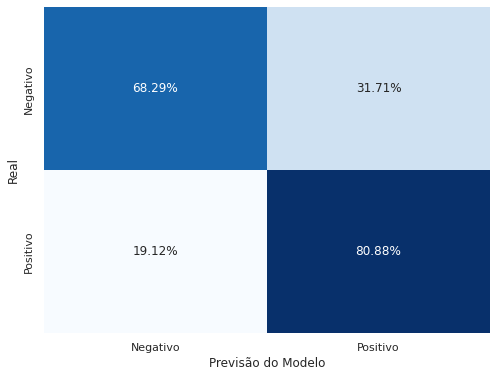

In [0]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(Y_test, Y_predict)
print("Matriz de Confusão:")
print(conf_matrix)

# Gerar um relatório de classificação (que inclui precision, recall e f1-score)
class_report = classification_report(Y_test, Y_predict)
print("Relatório de Classificação:")
print(class_report)

# Calcular a AUC (área sob a curva ROC)
y_prob = modelo.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, y_prob)
print("AUC:", auc)

conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plotar a matriz de confusão em percentagens
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False, xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsão do Modelo")
plt.ylabel("Real")

plt.show()

Feature ranking:
1. feature 0 (0.354573)
2. feature 5 (0.171133)
3. feature 6 (0.168458)
4. feature 3 (0.041009)
5. feature 2 (0.029880)
6. feature 4 (0.025437)
7. feature 16 (0.024844)
8. feature 1 (0.024720)
9. feature 17 (0.023533)
10. feature 15 (0.021063)
11. feature 7 (0.019203)
12. feature 13 (0.018576)
13. feature 12 (0.017970)
14. feature 8 (0.017037)
15. feature 18 (0.016582)
16. feature 10 (0.014509)
17. feature 14 (0.011472)
18. feature 11 (0.000000)
19. feature 9 (0.000000)


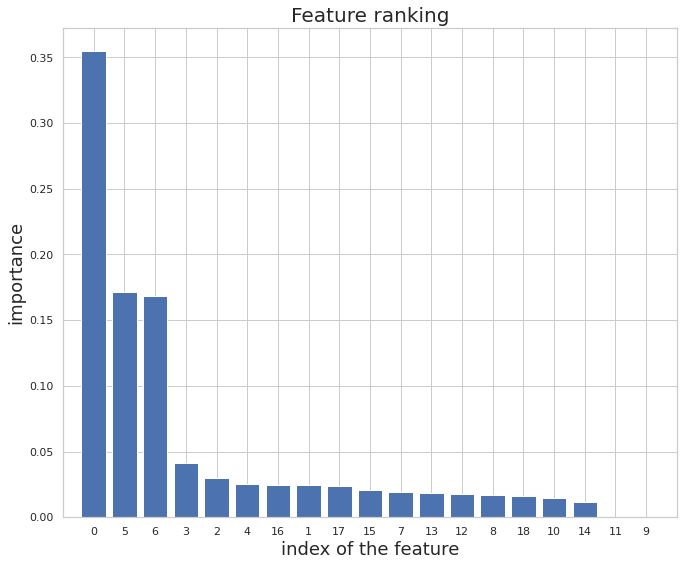

Out[55]: Index(['IDADE', 'HIPERTENSO', 'DOENCA_CARDIACA', 'JA_FOI_CASADO', 'RESIDENCIA',
       'NIVEL_MEDIO_GLICOSE', 'IMC', 'MASCULINO', 'FEMININO', 'OUTROS',
       'TP_TRAB_FUNCIONARIO_PUBLICO', 'TP_TRAB_NUNCA_TRABALHOU',
       'TP_TRAB_PRIVADO', 'TP_TRAB_AUTONOMO', 'TP_TRAB_CRIANCA',
       'TP_TRAB_DESCONHECIDO', 'EX_FUMANTE', 'NUNCA_FUMOU', 'FUMANTE'],
      dtype='object')

In [0]:
importances = modelo.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()


df_pd.drop(columns=['AVC']).columns[:]